### Data read-in

In [2]:
df = pd.read_csv('../cleaned_data.csv')

### Work on EAOS date

In [ ]:
trans = df[df['Your_transition_to_civilian_life_begin'].notnull()]

##### Change dates to datetime format

In [4]:
trans['CreatedDate'] = pd.to_datetime(trans['CreatedDate'])

<ipython-input-4-6ec28887f577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['CreatedDate'] = pd.to_datetime(trans['CreatedDate'])


In [5]:
trans.loc[:,'Your_transition_to_civilian_life_begin'] = pd.to_datetime(trans['Your_transition_to_civilian_life_begin'])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
trans.rename(columns={'Your_transition_to_civilian_life_begin':'EAOS'}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
days = (trans['EAOS'] - trans['CreatedDate']).dt.days

In [8]:
recent = days[days > -360]

Text(125, 0.0022, '6-month Mark')

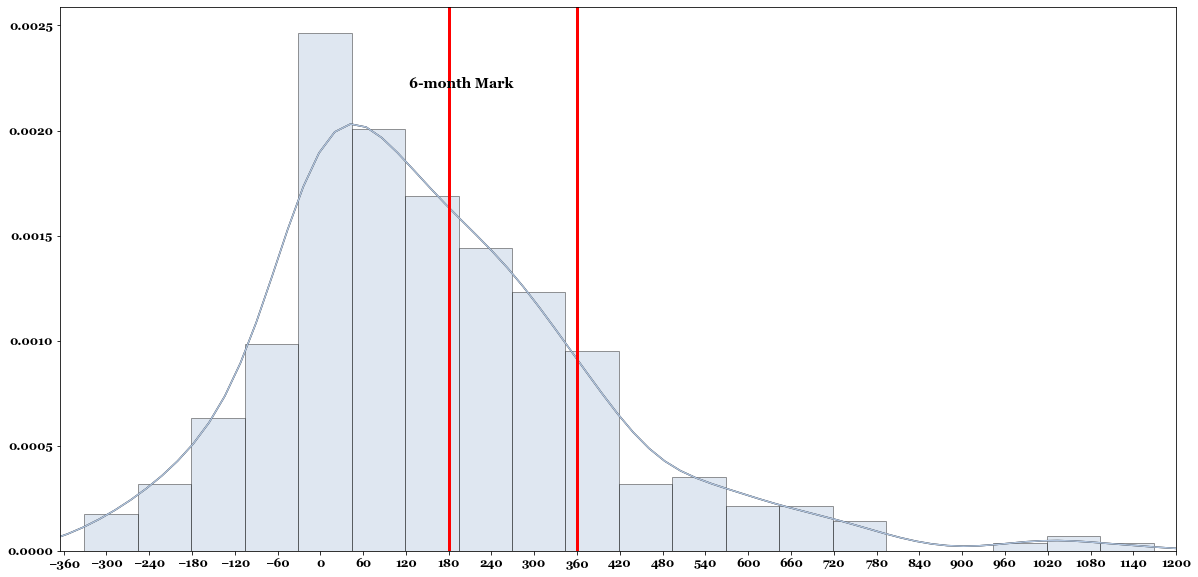

In [9]:

ax0=sns.kdeplot(recent, color='black')
ax = sns.distplot(recent, hist_kws=dict(edgecolor="k", linewidth=1), color='lightsteelblue')
xlim = plt.xlim(-365, 1200)
xticks = plt.xticks(range(-360,1260,60))
plt.axvline(x=180, lw=3, color='red')
plt.axvline(x=360, lw=3, color='red')
plt.text(x=125, y=0.0022, s='6-month Mark', fontdict={'fontsize':14})

In [24]:
df.head()

,Id,Birthdate,CreatedDate,Location,City,State,CityState,How_did_you_hear_about_Elite_Meet,Your_transition_to_civilian_life_begin,Undergrad,Undergrad_School,Undergrad_major,Grad_Degree,Graduate_School,Grad_Degree_Type,Years_of_Service,Officer,Military_specialty_in_real_words,Whichcourse,When_did_you_graduate,What_was_your_first_unit_after_grad,Branch,Tribe,What_locations_do_you_WANT_to_live_in,Where_do_you_NOT_WANT_to_live,What_would_be_your_ideal_next_job,Target_Industries_Pls_pick_up_to_Three,of_informational_interviews_completed,of_job_formal_interviews_completed,of_counting_getting_a_job_through_EM,What_s_more_important_to_you,How_mobile_are_you_and_your_family,Lead_RecordType,Created,Approx_Age
0,003f400000cZo1bAAC,NaN,10/16/18 15:40,"Washington,DC",Washington,DC,"Washington, DC",NaN,NaN,Complete,University of Charleston,Organizational Leadership,NaN,NaN,NaN,25.0,False,SEAL,BUD/S (SEAL),NaN,NaN,Navy,SEAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran,2018-10-16,44.0
1,003f400000cZo3EAAS,NaN,10/16/18 15:40,"Chattanooga, TN",Chattanooga,TN,"Chattanooga, TN",NaN,NaN,NaN,NaN,NaN,Complete,NaN,MBA,NaN,False,NaN,Q Course (SF),NaN,NaN,Army,Green Beret,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran,2018-10-16,NaN
2,003f400000dbBWeAAM,3/14/89 0:00,10/23/18 16:17,"San Diego,CA",San Diego,CA,"San Diego, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masters - Real Estate,9.0,False,SEAL,BUD/S (SEAL),7/31/10 0:00,SEAL Team 7,Navy,SEAL,San Diego/ Southern CA,"Mid west,south",NaN,Real Estate,NaN,NaN,NaN,Location,NaN,Veteran,2018-10-23,28.0
3,003f400000dbEUxAAM,9/29/83 0:00,10/23/18 16:30,"Houston,TX",Houston,TX,"Houston, TX",Friend,NaN,Complete,US Military Academy,Business Management,In Progress,NaN,MBA,11.0,True,Special Forces Team Commander,Q Course (SF),9/15/14 0:00,20th Special Forces Group,Army,Green Beret,"Houston,Fort Lauderdale,New York",West Coast,NaN,Entrepreneurship;Healthcare;Real Estate,NaN,NaN,NaN,Job,NaN,Veteran,2018-10-23,33.0
4,003f400000dbEUyAAM,7/4/92 0:00,10/23/18 16:30,"New York,NY",New York,NY,"New York, NY",Friend,NaN,In Progress,Columbia University,Economics,NaN,NaN,NaN,4.0,False,Infantry,RASP (RR),11/20/11 0:00,2/75 Ranger Regiment,Army,Ranger,"East or West Coast,Chicago",N/a,NaN,Finance;Consulting;Tech,NaN,NaN,NaN,Job,NaN,Veteran,2018-10-23,23.0


In [43]:
pd.set_option('display.max_rows', 800)

### Start work on creating new Location data coordinates for each member

Create new "CityState" column

In [23]:
df.insert(loc=6, column='CityState', value=df['City'] + ', ' + df['State'])

In [ ]:
lambda x: x[0]) + ',' + data['Location'].str.split(',').apply(lambda x: x[1]).str.replace('CA', "California")

In [90]:
df['CityState'] = df['CityState'].fillna(value='None, None').str.split(',').apply(lambda x: x[0]) + ',' + df['CityState'].fillna(value='None, None').str.split(',').apply(lambda x: x[1]).str.replace('CA', 'California')

In [34]:
coords = pd.read_csv('vets_coords.csv')

719

In [92]:
merged = pd.merge(df, coords, how='left', left_on='CityState', right_on='Location')

In [94]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 751
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      752 non-null    object 
 1   Birthdate                               78 non-null     object 
 2   CreatedDate                             752 non-null    object 
 3   Location_x                              751 non-null    object 
 4   City                                    750 non-null    object 
 5   State                                   750 non-null    object 
 6   CityState                               752 non-null    object 
 7   How_did_you_hear_about_Elite_Meet       541 non-null    object 
 8   Your_transition_to_civilian_life_begin  452 non-null    object 
 9   Undergrad                               638 non-null    object 
 10  Undergrad_School                        684 non-null    object

In [97]:
merged = merged[merged['Location_x'] != 'USA']

In [98]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 751
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      720 non-null    object 
 1   Birthdate                               78 non-null     object 
 2   CreatedDate                             720 non-null    object 
 3   Location_x                              719 non-null    object 
 4   City                                    718 non-null    object 
 5   State                                   718 non-null    object 
 6   CityState                               720 non-null    object 
 7   How_did_you_hear_about_Elite_Meet       512 non-null    object 
 8   Your_transition_to_civilian_life_begin  437 non-null    object 
 9   Undergrad                               613 non-null    object 
 10  Undergrad_School                        660 non-null    object

In [103]:
merged.to_csv('merged_df_dash.csv', index=False)

In [126]:
for branch in merged['Branch'].unique():
    df = merged[merged['Branch'] == branch]
    print(f'Here are the results for the {branch}\n')
    df.groupby(['latitude', 'longitude'])['CityState'].count().index[0]
    print('\n')

Here are the results for the Navy



(1.340863, 103.8303918221208)



Here are the results for the Army



(8.9714493, -79.53418020000002)



Here are the results for the Air Force



(21.304547, -157.8556764)



Here are the results for the Marine Corps



(27.947759499999997, -82.458444)



Here are the results for the Coast Guard



(38.8949924, -77.0365581)

In [178]:
navy = merged[merged['Branch'] == 'Navy']
grouped = navy.groupby(['CityState', 'latitude', 'longitude'])['Id'].count().reset_index()

In [183]:
def scaler

0      4.000000
1      4.417582
2      4.000000
3      4.417582
4      4.417582
5      4.000000
6      4.000000
7      4.000000
8      4.626374
9      4.000000
10     4.000000
11     4.626374
12     4.208791
13     4.000000
14     4.208791
15     4.000000
16     5.043956
17     4.626374
18     4.000000
19     4.208791
20     4.208791
21     4.000000
22     4.000000
23     4.000000
24     4.000000
25     4.000000
26     4.000000
27     4.000000
28     4.000000
29     6.296703
30     5.043956
31     4.000000
32     4.000000
33     4.000000
34     4.000000
35     4.000000
36     4.000000
37     4.000000
38     4.835165
39     4.000000
40     4.000000
41     4.000000
42     4.000000
43     4.000000
44     4.208791
45     4.000000
46     4.000000
47     4.000000
48     4.000000
49     4.000000
50     4.000000
51     4.835165
52     4.000000
53     4.000000
54     4.000000
55     4.208791
56     4.208791
57     4.208791
58     4.000000
59     4.000000
60     4.000000
61     4.000000
62     4